Quantization is the process in which an analog signal is converted to and approximate digital signal which consists of only a finite number of predecided levels in amplitude.

A quantizer can be defined by the following function.

\begin{equation*}
x_Q[k] = Q \cdot \lfloor \frac{x[k]}{Q} + \frac{1}{2} \rfloor
\end{equation*}

where Q denotes the quantization step size and the floor function $\lfloor \cdot \rfloor$ maps a real number to the largest integer not greater than its argument.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
A = 1.2
Q = 1/8
N = 2000

In [7]:
def uniform_quantizer(x, Q):
    # limiter
    x = np.copy(x)
    idx = np.where(np.abs(x) >= 1)
    x[idx] = np.sign(x[idx])
    # linear uniform quantization
    xQ = Q * np.floor(x/Q + 1/2)
    
    return xQ

In [8]:
def plot_signals(x, xQ):
    e = xQ - x
    plt.figure(figsize=(10, 6))
    plt.plot(x, label=r'discrete signal $x[k]$')
    plt.plot(xQ, label=r'quantized signal $x_Q[k]$')
    plt.plot(e, label=r'quantization error signal $e[k]$')
    plt.xlabel(r'$k$')
    plt.axis([0, N, -1.1*A, 1.1*A])
    plt.legend()
    plt.grid()

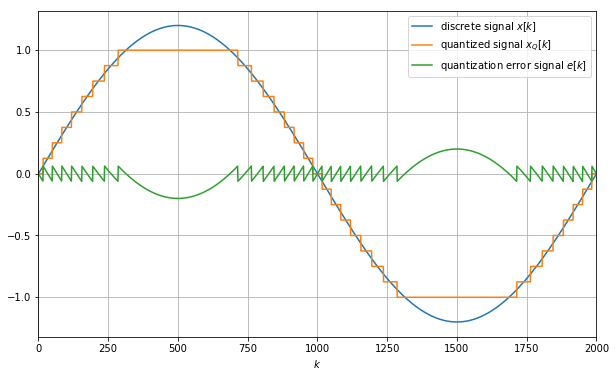

In [9]:
# generate signal
x = A * np.sin(2*np.pi/N * np.arange(N))
# quantized signal
xQ = uniform_quantizer(x, Q)
# plot signals
plot_signals(x, xQ)